In [17]:
library(tidyverse)
library(dplyr)
library(tidyr)
library(vegan)

### Data cleaning

In [23]:
data_raw <- read.csv(
  "Predator_and_prey_body_sizes_in_marine_food_webs.csv",
  header = TRUE,
  sep = "\t",
  quote = "",
  check.names = TRUE,
  strip.white = TRUE,
  fileEncoding = "latin1"
)

cols_to_keep <- c("X.Record_number", "Individual_ID", "Predator",
                  "Predator._taxon", "Predator_lifestage",
                  "Type_of_feeding_interaction", "Standardised.predator.length",
                  "SI.predator.mass", "Diet.coverage",
                  "Prey", "Prey.taxon", "SI.prey.length", "SI.prey.mass",
                  "Geographic.location", "Latitude", "Longitude",
                  "Depth", "Mean.annual.temp", "SD.annual.temp",
                  "Mean.PP", "SD.PP", "Specific.habitat")

data_clean <- data_raw[, cols_to_keep, drop = FALSE]

#head(data_clean)
#tail(data_clean)
data_clean

X.Record_number,Individual_ID,Predator,Predator._taxon,Predator_lifestage,Type_of_feeding_interaction,Standardised.predator.length,SI.predator.mass,Diet.coverage,Prey,⋯,SI.prey.mass,Geographic.location,Latitude,Longitude,Depth,Mean.annual.temp,SD.annual.temp,Mean.PP,SD.PP,Specific.habitat
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
"""1",1,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,93.990,1539.900,all,teleosts/molluscs/crustaceans,⋯,14.27400,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
"""2",2,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,95.195,1597.800,all,teleosts/molluscs/crustaceans,⋯,6.02130,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
"""3",3,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,100.020,1843.600,all,teleosts/molluscs/crustaceans,⋯,11.89300,"""""Apalachicola Bay"","" Florida""""","29""""nN","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
"""4",4,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,34.945,87.631,all,teleosts/molluscs/crustaceans,⋯,8.12200,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
"""5",5,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,31.330,63.866,all,teleosts/molluscs/crustaceans,⋯,6.56230,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
"""6",6,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,33.740,79.161,all,teleosts/molluscs/crustaceans,⋯,5.40650,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
"""7",7,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,32.535,71.245,all,teleosts/molluscs/crustaceans,⋯,4.45430,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
"""8",8,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,35.548,92.080,all,teleosts/molluscs/crustaceans,⋯,5.98280,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
"""9",9,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,33.740,79.161,all,teleosts/molluscs/crustaceans,⋯,6.95040,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay


### Visualisation

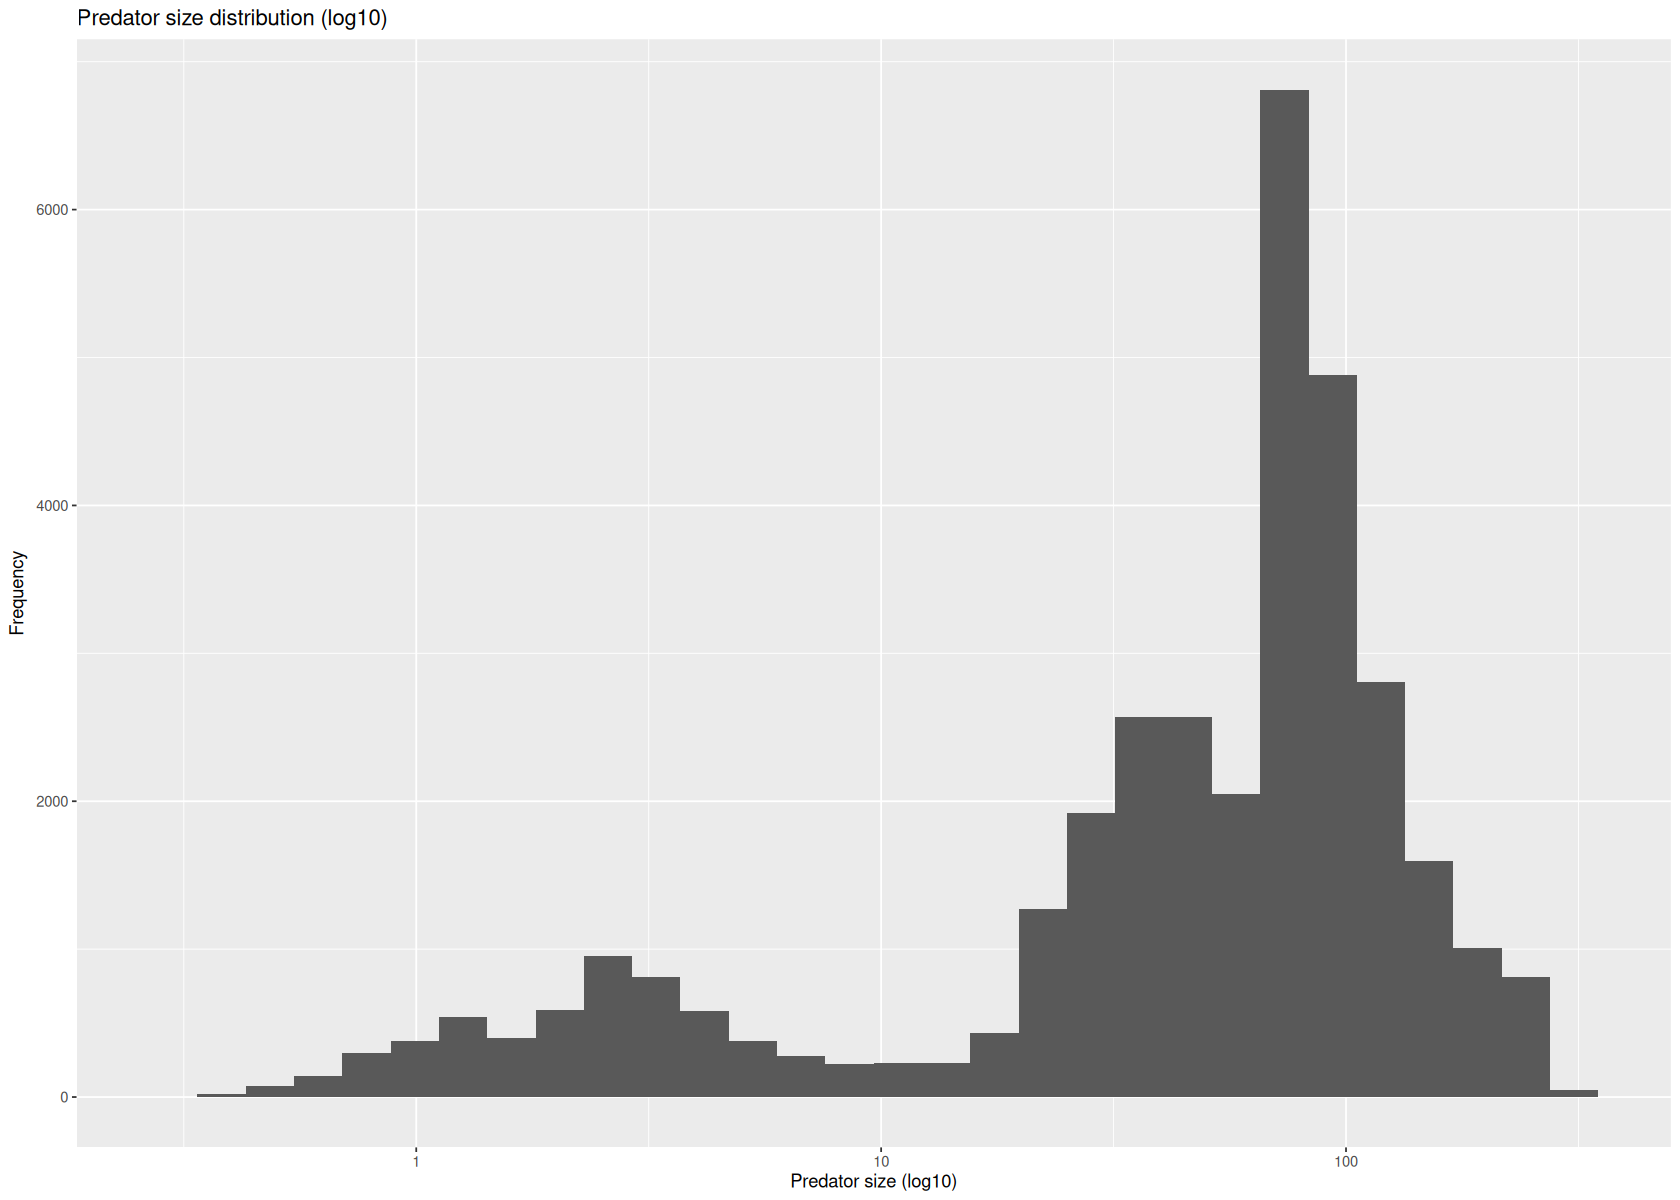

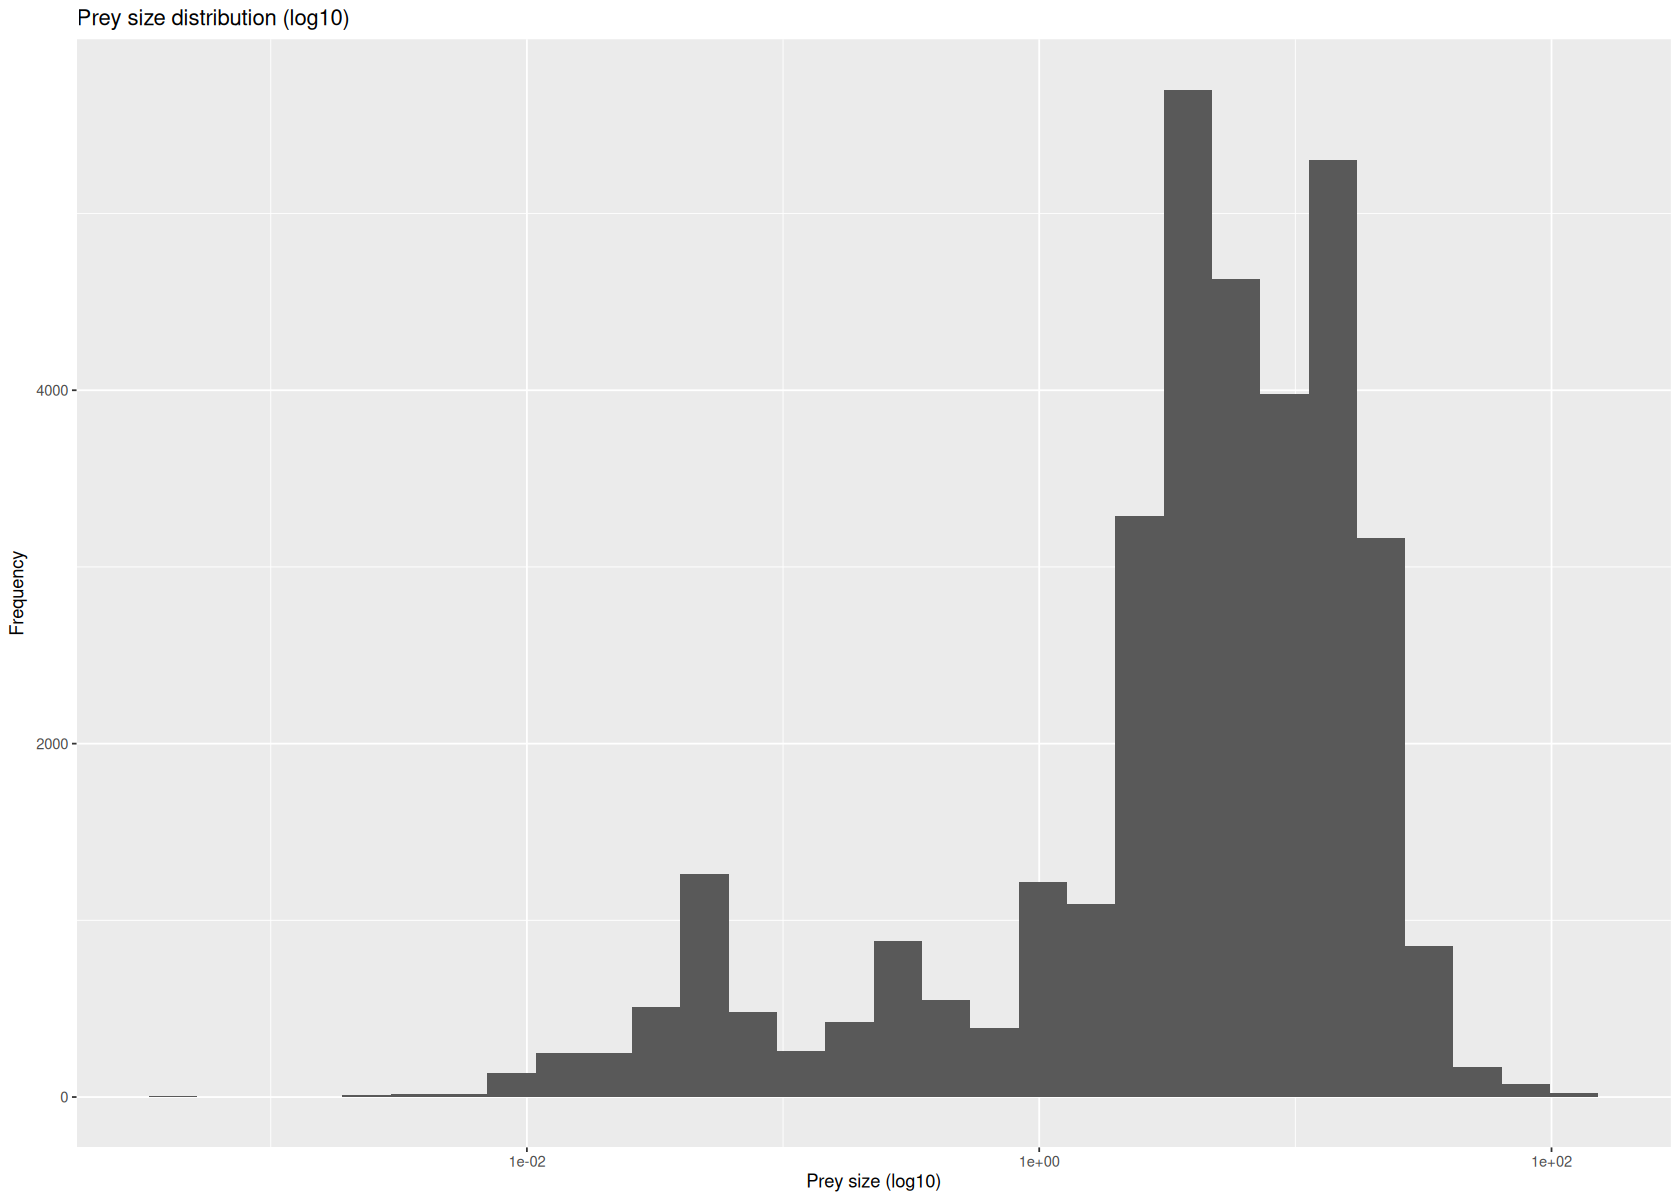

In [9]:
ggplot(data_clean, aes(x = Standardised.predator.length)) +
  geom_histogram(bins = 30) +
  scale_x_log10() +
  labs(title = "Predator size distribution (log10)",
       x = "Predator size (log10)", y = "Frequency")

ggplot(data_clean, aes(x = SI.prey.length)) +
  geom_histogram(bins = 30) +
  scale_x_log10() +
  labs(title = "Prey size distribution (log10)",
       x = "Prey size (log10)", y = "Frequency")

### Log transformation

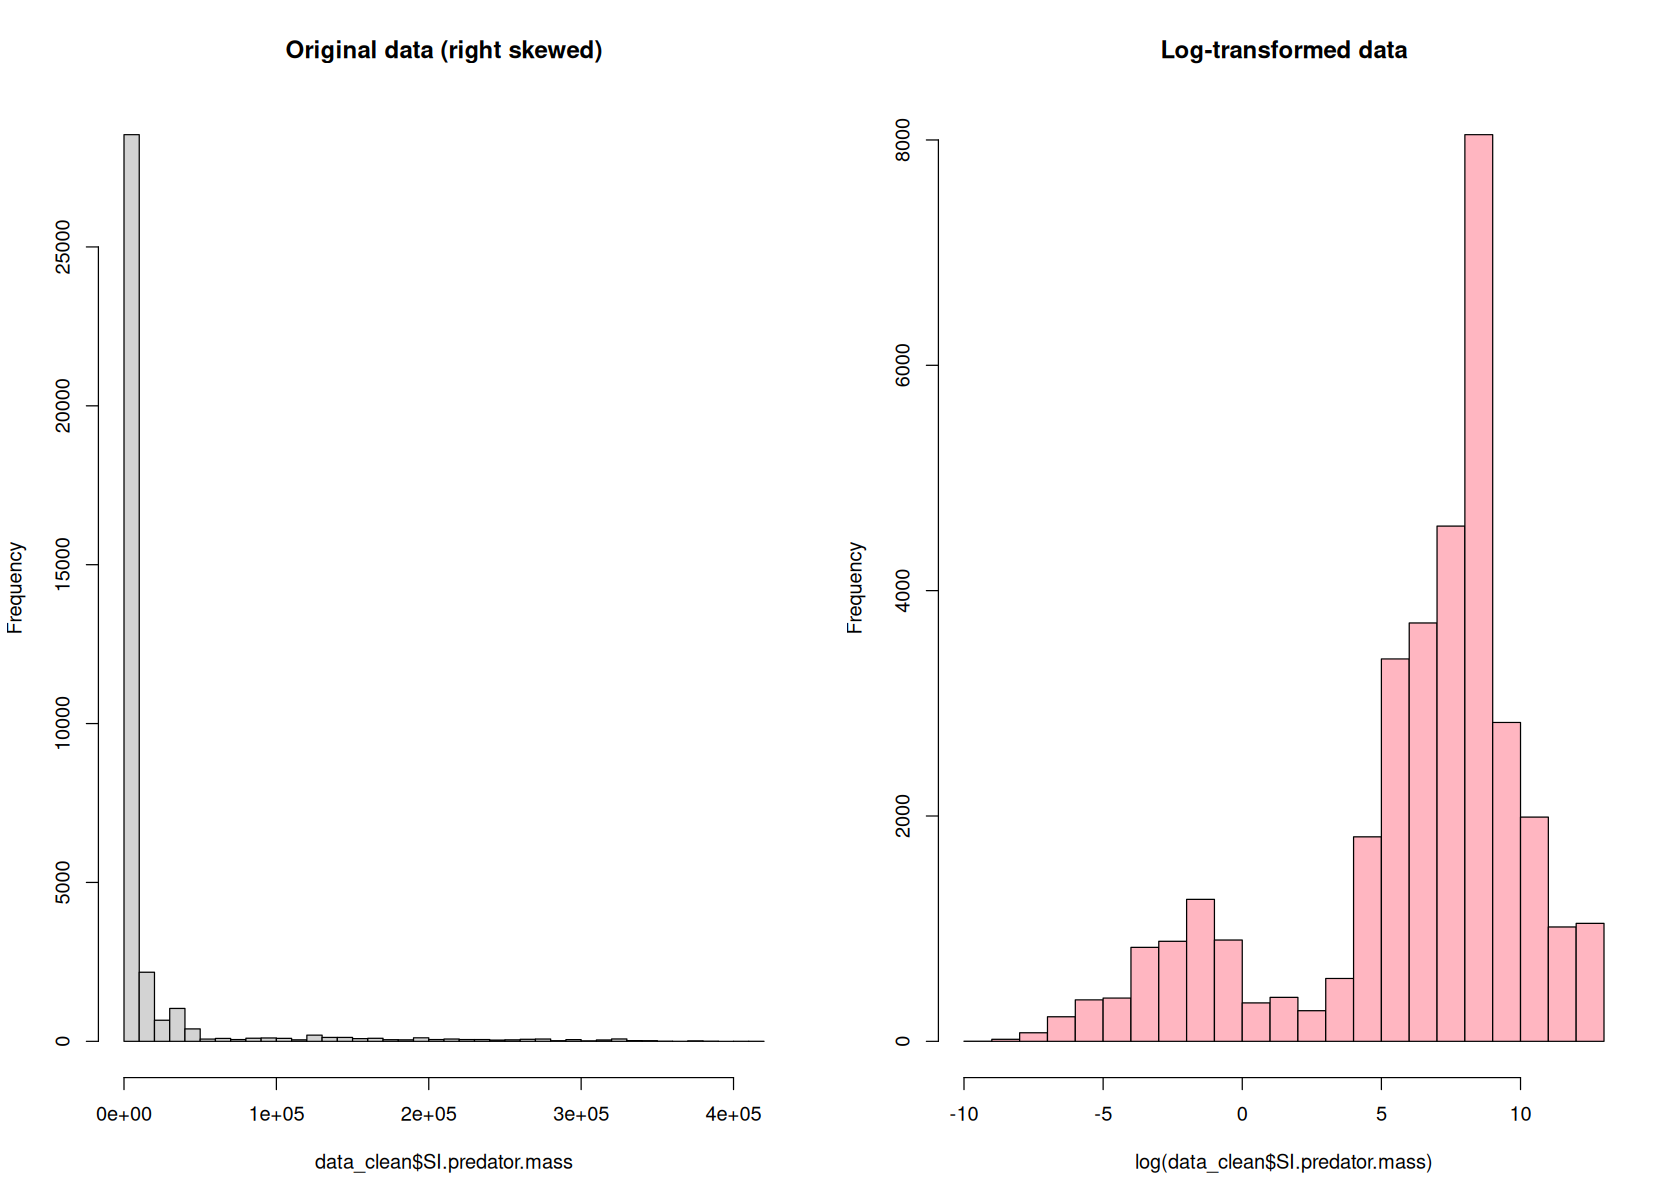

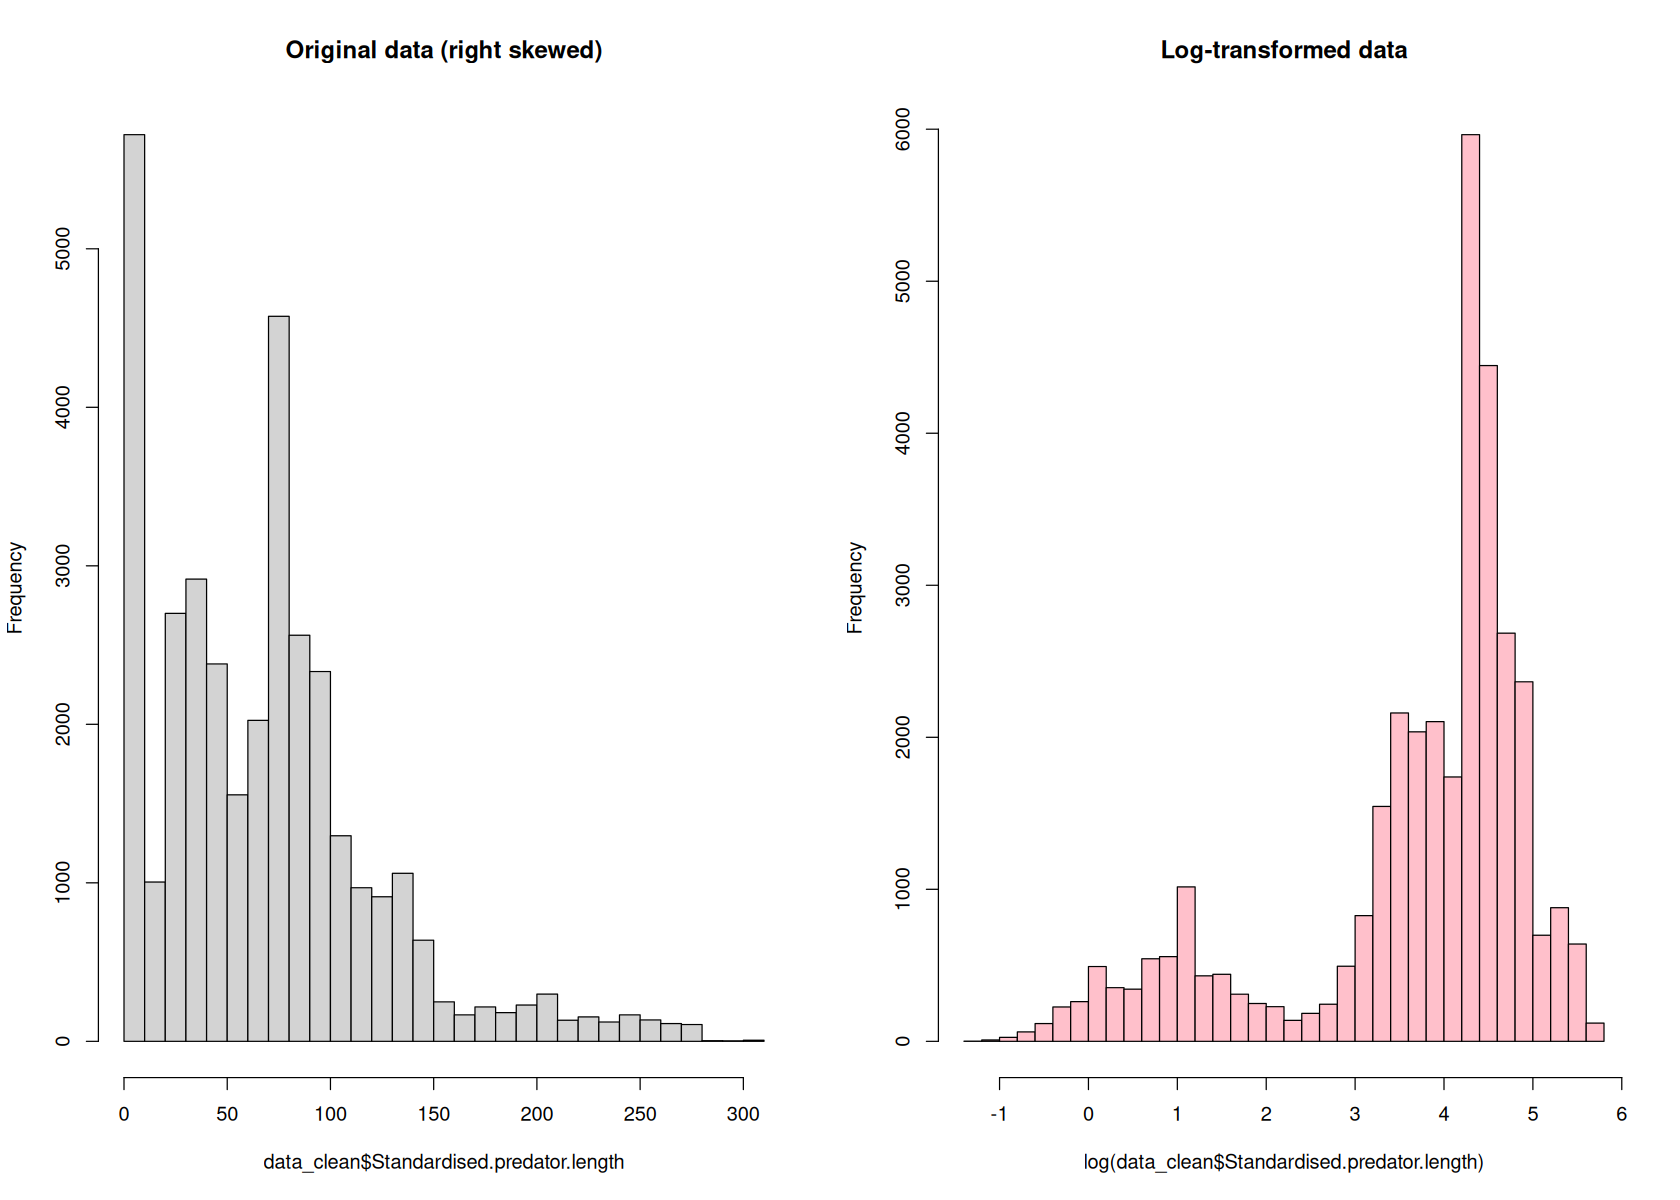

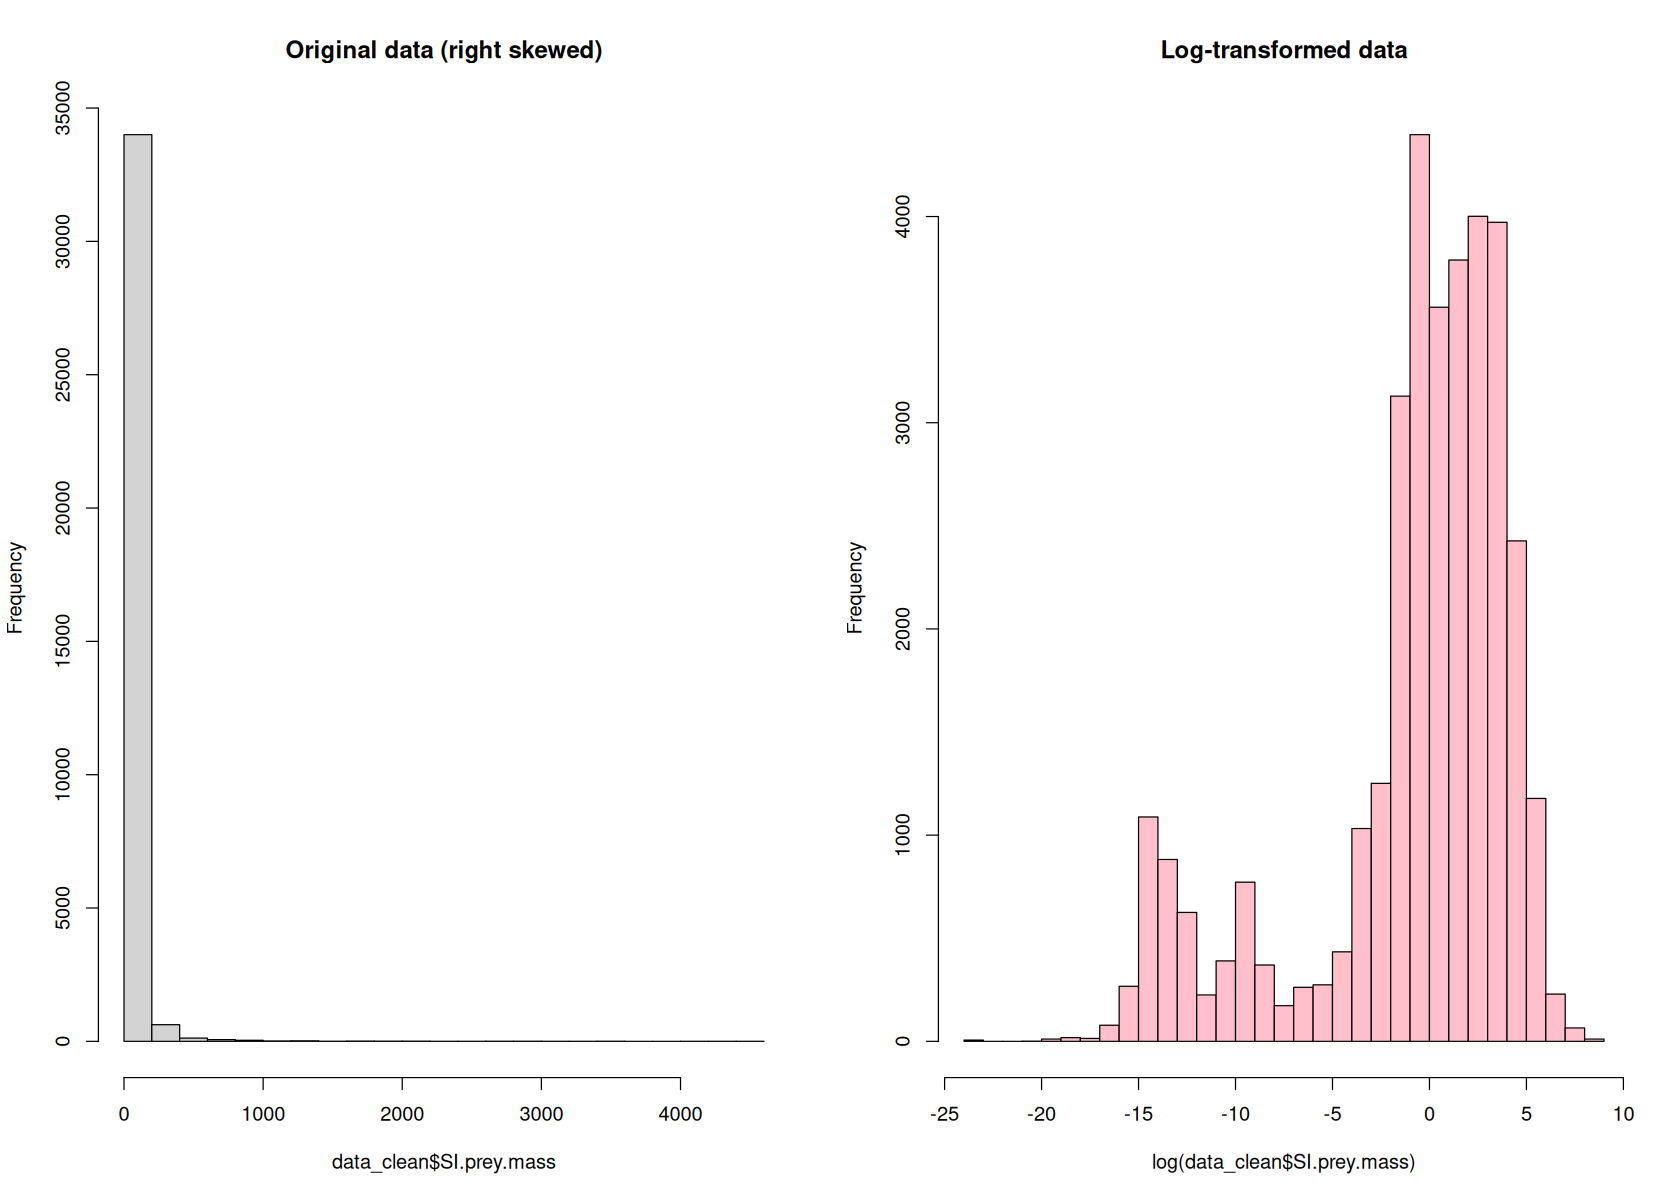

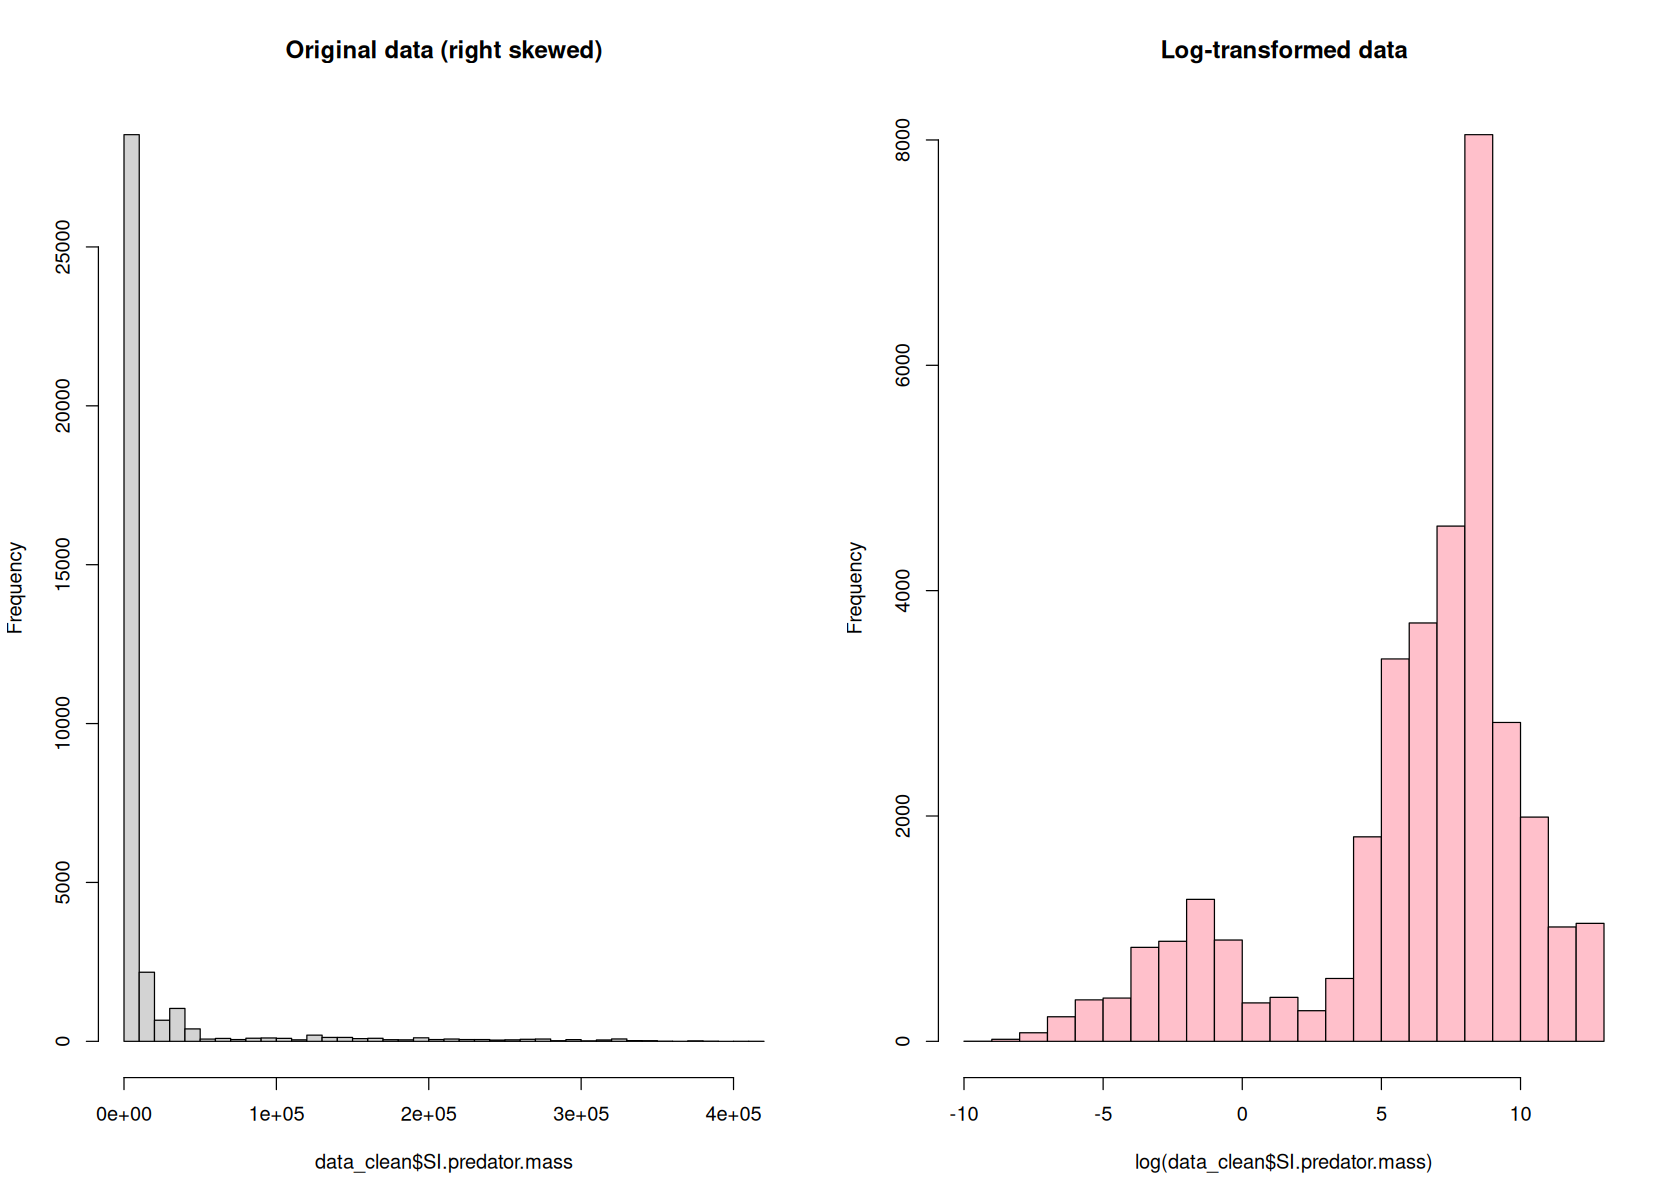

In [15]:
# Create example data frame with right-skewed data
# right_skewed_data<-rnbinom(10000, 3, 0.15) #check out ?rbeta and ?rnbinom for non-normal distributions!

par(mfrow = c(1, 2))

# Set plot size in Jupyter Notebook (14 x 10 inches)
options(repr.plot.width = 14, repr.plot.height = 10)

# Histogram before transformation 
hist(data_clean$SI.predator.mass, breaks = 30, main = "Original data (right skewed)", col = "lightgray")
# Histogram after log transformation 
hist(log(data_clean$SI.predator.mass), breaks = 30, main = "Log-transformed data", col = "lightpink")

# Histogram before transformation 
hist(data_clean$Standardised.predator.length, breaks = 30, main = "Original data (right skewed)", col = "lightgray")
# Histogram after log transformation 
hist(log(data_clean$Standardised.predator.length), breaks = 30, main = "Log-transformed data", col = "pink")

# Histogram before transformation 
hist(data_clean$SI.prey.mass, breaks = 30, main = "Original data (right skewed)", col = "lightgray")
# Histogram after log transformation 
hist(log(data_clean$SI.prey.mass), breaks = 30, main = "Log-transformed data", col = "pink")

# Histogram before transformation 
hist(data_clean$SI.predator.mass, breaks = 30, main = "Original data (right skewed)", col = "lightgray")
# Histogram after log transformation 
hist(log(data_clean$SI.predator.mass), breaks = 30, main = "Log-transformed data", col = "pink")


### Analyse des predateurs

In [1]:
### Est-ce que chaque espèce de prédateur a une intensité de prédation moyenne distincte ?

               Df Sum Sq Mean Sq F value Pr(>F)    
Predator       92    659   7.160   5.759 <2e-16 ***
Residuals   34838  43314   1.243                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message:
“not plotting observations with leverage one:
  18795, 28164, 28291, 28292”


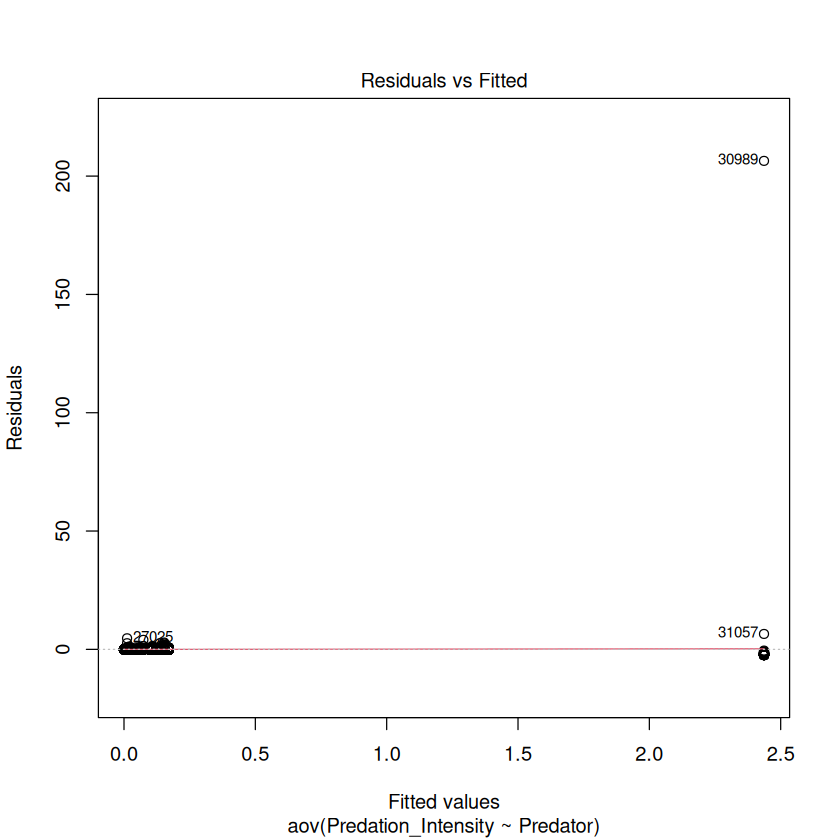

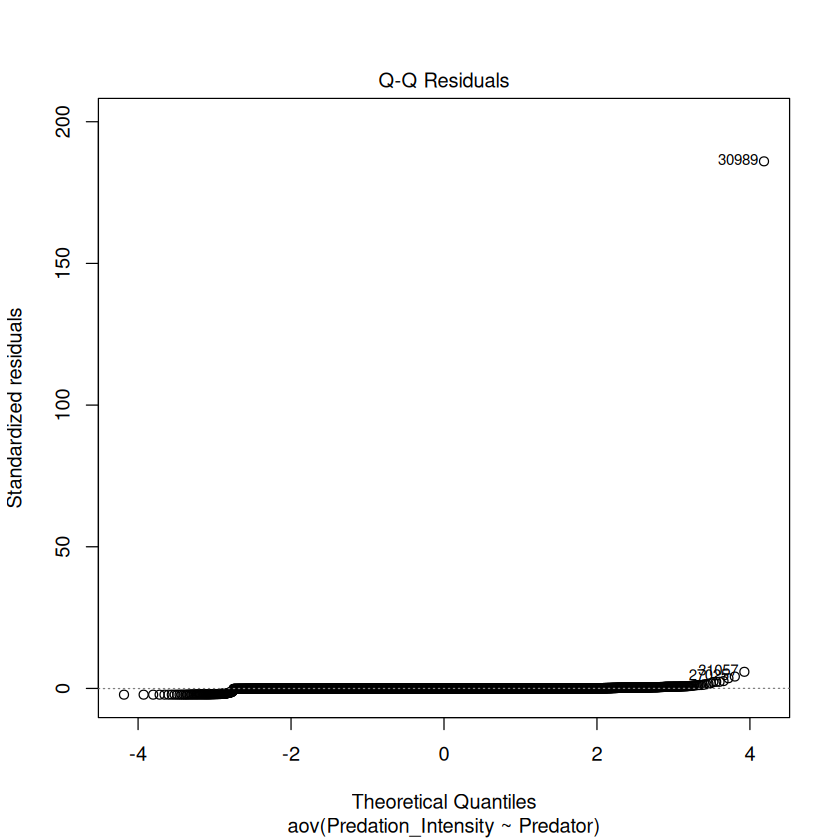

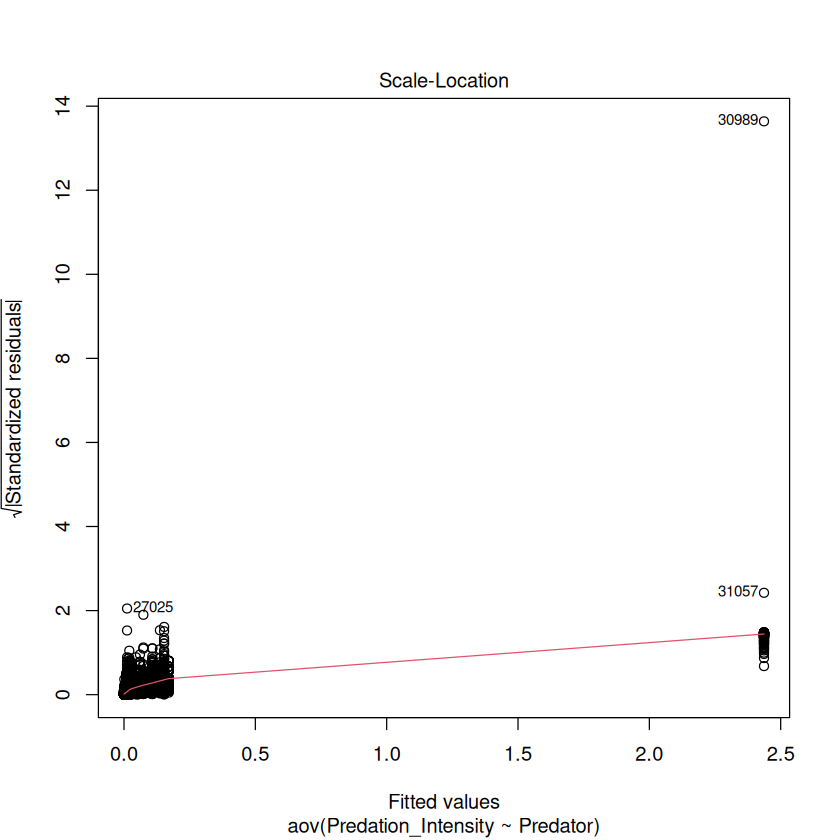

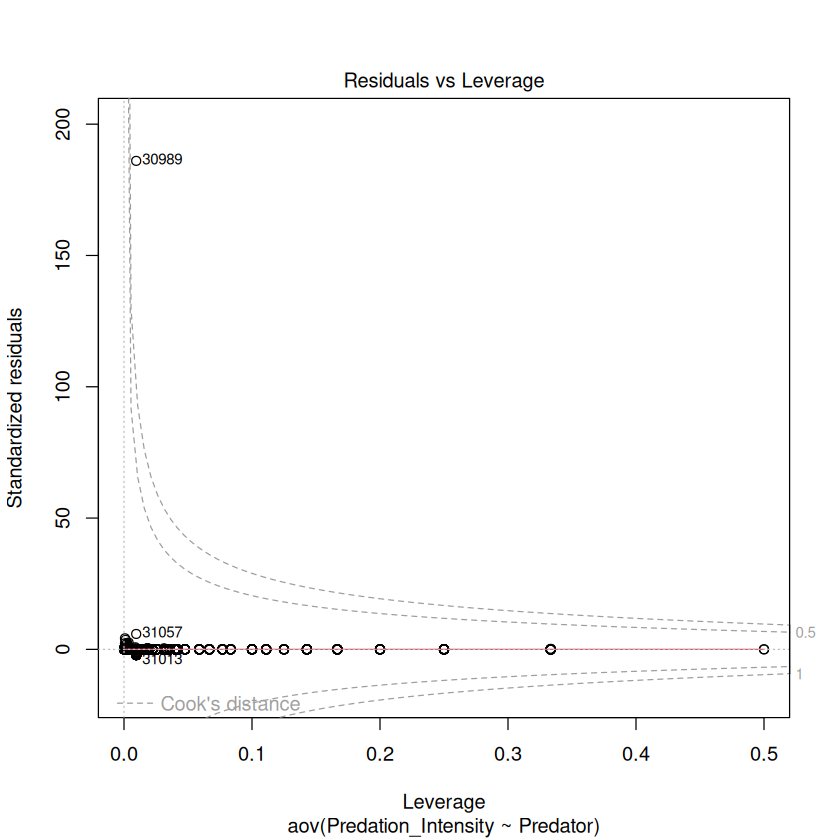

In [24]:
# Intesite de predation = prey mass / predator mass :

# Rjt colonne Predation Intensity
data_clean <- data_clean %>%
  mutate(Predation_Intensity = SI.prey.mass / SI.predator.mass)

anova_length <- aov(Predation_Intensity ~ Predator, data = data_clean)
summary(anova_length)
plot(anova_length)

In [ ]:
# Df = degrees of freedom (93 predators in total), Sum sq = sum of squares, Mean sq, F value = test statistic, Pr(>F) = p-value

# Highly significant difference btw predator sizes, bc F large and p very small

In [ ]:
### Espèce de proies distincte par predateur ?

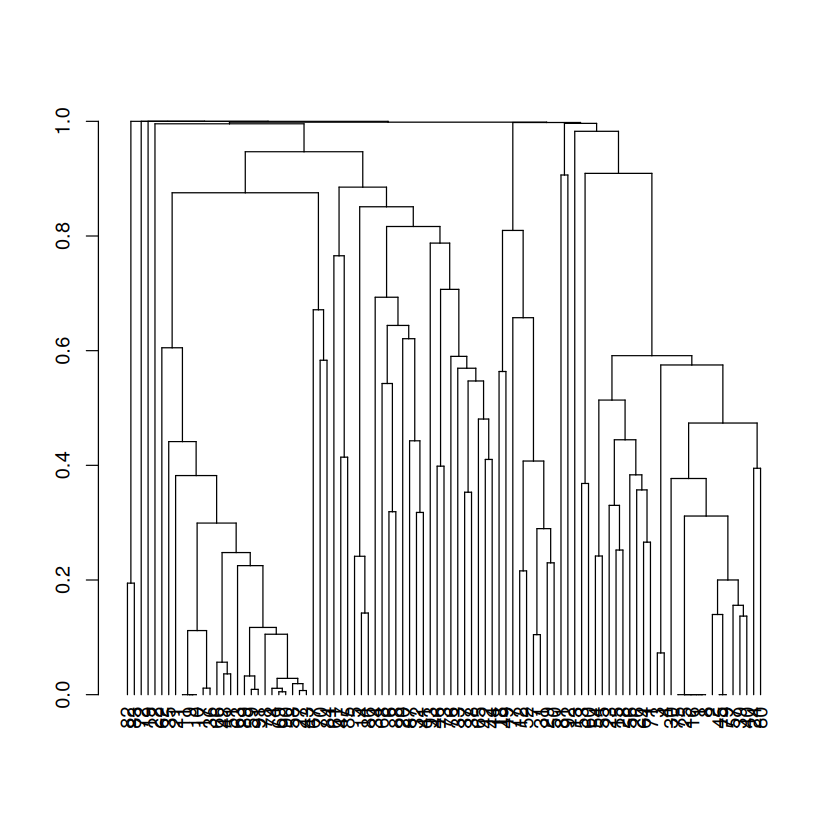

In [20]:
library(tidyr)
library(vegan)

mat <- data_clean %>%
  count(Predator, Prey) %>%
  pivot_wider(names_from = Prey, values_from = n, values_fill = 0)

# standardize abundance
mat_norm <- decostand(mat[,-1], method = "hellinger")

# compute Bray–Curtis
dist_pred <- vegdist(mat_norm, method = "bray")

# hierarchical clustering
hc <- hclust(dist_pred, method = "average")
plot(as.dendrogram(hc))

In [ ]:
### Range de taille de proies distinctes ?

In [21]:
# compute range per predator
prey_range <- data_clean %>%
  group_by(Predator) %>%
  summarise(range_prey = max(SI.prey.length, na.rm=TRUE) - 
                        min(SI.prey.length, na.rm=TRUE))

# ANOVA on range
anova_range <- aov(range_prey ~ Predator, data = prey_range)
summary(anova_range)

            Df Sum Sq Mean Sq
Predator    92  55388     602

In [ ]:
### Ratio taille prédateur / taille proie diffère entre espèces ?

In [22]:
data_clean$ratio <- data_clean$Standardised.predator.length / data_clean$SI.prey.length

anova_ratio <- aov(ratio ~ Predator, data = data_clean)
summary(anova_ratio)

               Df   Sum Sq Mean Sq F value Pr(>F)    
Predator       92 11532994  125359   157.8 <2e-16 ***
Residuals   34838 27675149     794                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
coucou